In [47]:
pip install --upgrade numpy statsmodels


Requirement already up-to-date: numpy in c:\users\hp\anaconda3\lib\site-packages (1.24.4)Note: you may need to restart the kernel to use updated packages.
Requirement already up-to-date: statsmodels in c:\users\hp\anaconda3\lib\site-packages (0.14.1)



In [48]:

!pip install --upgrade numpy



Requirement already up-to-date: numpy in c:\users\hp\anaconda3\lib\site-packages (1.24.4)


In [49]:
!pip install --upgrade seaborn
!pip install --upgrade matplotlib

Requirement already up-to-date: seaborn in c:\users\hp\anaconda3\lib\site-packages (0.13.2)
Requirement already up-to-date: matplotlib in c:\users\hp\anaconda3\lib\site-packages (3.7.5)


In [50]:
import numpy as np
import statsmodels as sm
print(np.__version__)
print(sm.__version__)



1.24.4
0.14.1


In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; 


%matplotlib inline

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
# Import stats from scipy
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math

In [52]:

Default1= pd.read_csv("baseball.csv")

Default1.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [53]:
Default1.tail()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [54]:
print('The number of rows (observations) is',Default1.shape[0],'\n''The number of columns (variables) is',Default1.shape[1])

The number of rows (observations) is 30 
The number of columns (variables) is 17


In [55]:
Default1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [56]:
print("No.Of Duplicate Rows",Default1.duplicated().sum())

No.Of Duplicate Rows 0


In [57]:
Default1.shape

(30, 17)

In [58]:
Default1.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [59]:
Default1.describe(include="all")

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


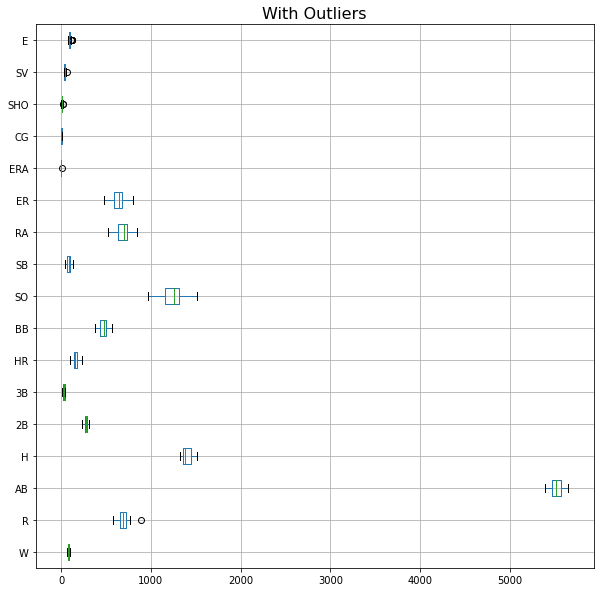

In [60]:

plt.figure(figsize=(10,10))
Default1.boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [61]:
Q1 = Default1.quantile(0.25)
Q3 = Default1.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [62]:
((Default1> UL) | (Default1 < LL)).sum()

W      0
R      1
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    1
CG     0
SHO    2
SV     1
E      5
dtype: int64

In [63]:
import seaborn as sns
print(sns.__version__)


0.13.2


In [64]:
def univariateAnalysis(column):
    print("Description of"+column)
    print(Default1[column].describe(),end=' ')
    plt.figure()
    print("Description of"+column)
    sns.distplot(Default1[column],kde=True,color='g',norm_hist=True);
    plt.show()

In [65]:
df2=Default1.select_dtypes(include=['float64','int64'])
lstnumericcolumns=list(df2.columns)
len(lstnumericcolumns)

17

Description ofW
count     30.000000
mean      80.966667
std       10.453455
min       63.000000
25%       74.000000
50%       81.000000
75%       87.750000
max      100.000000
Name: W, dtype: float64 Description ofW


<ipython-input-64-f2b73f56334b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Default1[column],kde=True,color='g',norm_hist=True);


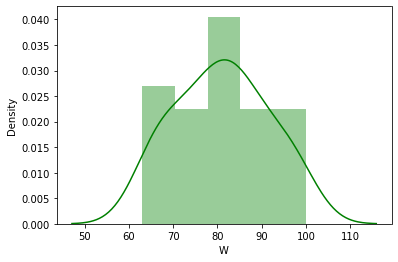

Description ofR
count     30.000000
mean     688.233333
std       58.761754
min      573.000000
25%      651.250000
50%      689.000000
75%      718.250000
max      891.000000
Name: R, dtype: float64 Description ofR


<ipython-input-64-f2b73f56334b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Default1[column],kde=True,color='g',norm_hist=True);


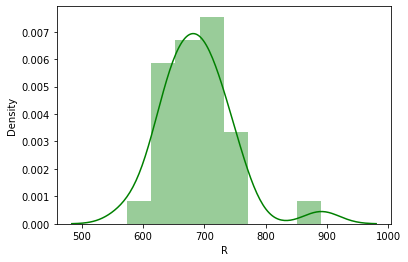

Description ofAB
count      30.000000
mean     5516.266667
std        70.467372
min      5385.000000
25%      5464.000000
50%      5510.000000
75%      5570.000000
max      5649.000000
Name: AB, dtype: float64 Description ofAB


<ipython-input-64-f2b73f56334b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Default1[column],kde=True,color='g',norm_hist=True);


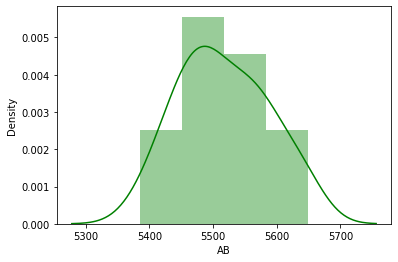

Description ofH
count      30.000000
mean     1403.533333
std        57.140923
min      1324.000000
25%      1363.000000
50%      1382.500000
75%      1451.500000
max      1515.000000
Name: H, dtype: float64 Description ofH


<ipython-input-64-f2b73f56334b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Default1[column],kde=True,color='g',norm_hist=True);


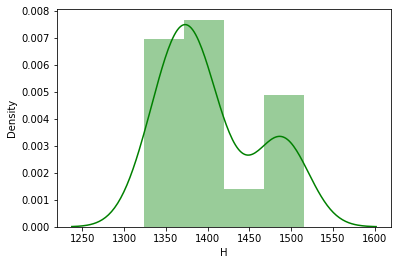

Description of2B
count     30.000000
mean     274.733333
std       18.095405
min      236.000000
25%      262.250000
50%      275.500000
75%      288.750000
max      308.000000
Name: 2B, dtype: float64 Description of2B


<ipython-input-64-f2b73f56334b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Default1[column],kde=True,color='g',norm_hist=True);


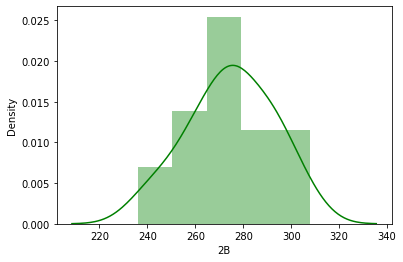

Description of3B
count    30.000000
mean     31.300000
std      10.452355
min      13.000000
25%      23.000000
50%      31.000000
75%      39.000000
max      49.000000
Name: 3B, dtype: float64 Description of3B


<ipython-input-64-f2b73f56334b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Default1[column],kde=True,color='g',norm_hist=True);


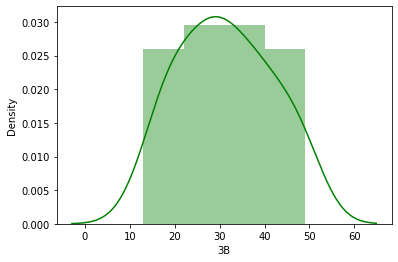

Description ofHR
count     30.000000
mean     163.633333
std       31.823309
min      100.000000
25%      140.250000
50%      158.500000
75%      177.000000
max      232.000000
Name: HR, dtype: float64 Description ofHR


<ipython-input-64-f2b73f56334b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Default1[column],kde=True,color='g',norm_hist=True);


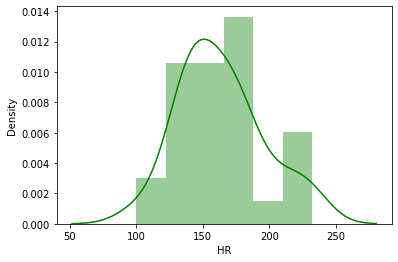

Description ofBB
count     30.000000
mean     469.100000
std       57.053725
min      375.000000
25%      428.250000
50%      473.000000
75%      501.250000
max      570.000000
Name: BB, dtype: float64 Description ofBB


<ipython-input-64-f2b73f56334b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Default1[column],kde=True,color='g',norm_hist=True);


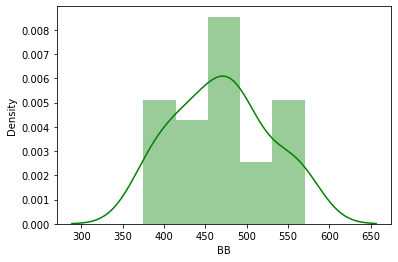

Description ofSO
count      30.00000
mean     1248.20000
std       103.75947
min       973.00000
25%      1157.50000
50%      1261.50000
75%      1311.50000
max      1518.00000
Name: SO, dtype: float64 Description ofSO


<ipython-input-64-f2b73f56334b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Default1[column],kde=True,color='g',norm_hist=True);


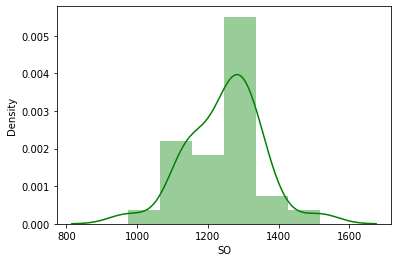

Description ofSB
count     30.000000
mean      83.500000
std       22.815225
min       44.000000
25%       69.000000
50%       83.500000
75%       96.500000
max      134.000000
Name: SB, dtype: float64 Description ofSB


<ipython-input-64-f2b73f56334b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Default1[column],kde=True,color='g',norm_hist=True);


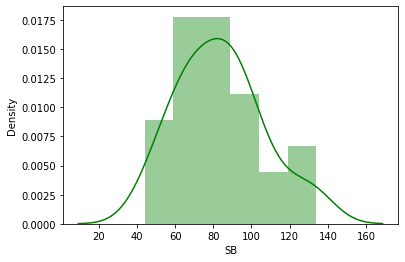

Description ofRA
count     30.000000
mean     688.233333
std       72.108005
min      525.000000
25%      636.250000
50%      695.500000
75%      732.500000
max      844.000000
Name: RA, dtype: float64 Description ofRA


<ipython-input-64-f2b73f56334b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Default1[column],kde=True,color='g',norm_hist=True);


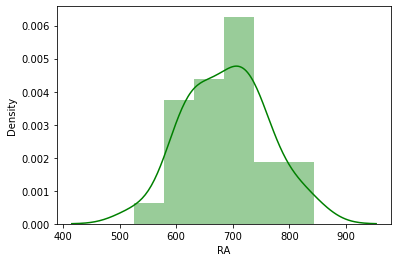

Description ofER
count     30.000000
mean     635.833333
std       70.140786
min      478.000000
25%      587.250000
50%      644.500000
75%      679.250000
max      799.000000
Name: ER, dtype: float64 Description ofER


<ipython-input-64-f2b73f56334b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Default1[column],kde=True,color='g',norm_hist=True);


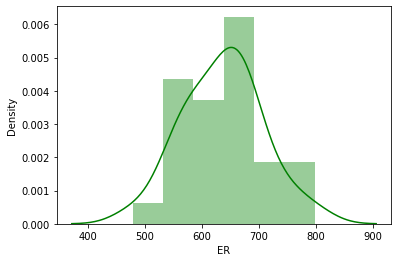

<ipython-input-64-f2b73f56334b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Default1[column],kde=True,color='g',norm_hist=True);


Description ofERA
count    30.000000
mean      3.956333
std       0.454089
min       2.940000
25%       3.682500
50%       4.025000
75%       4.220000
max       5.040000
Name: ERA, dtype: float64 Description ofERA


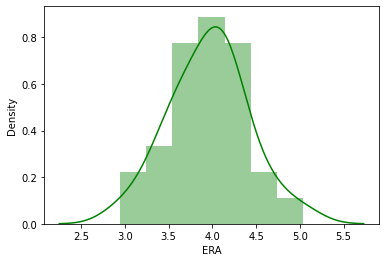

Description ofCG
count    30.000000
mean      3.466667
std       2.763473
min       0.000000
25%       1.000000
50%       3.000000
75%       5.750000
max      11.000000
Name: CG, dtype: float64 Description ofCG


<ipython-input-64-f2b73f56334b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Default1[column],kde=True,color='g',norm_hist=True);


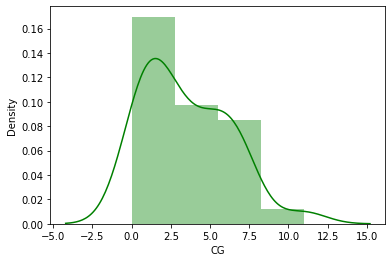

Description ofSHO
count    30.000000
mean     11.300000
std       4.120177
min       4.000000
25%       9.000000
50%      12.000000
75%      13.000000
max      21.000000
Name: SHO, dtype: float64 Description ofSHO


<ipython-input-64-f2b73f56334b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Default1[column],kde=True,color='g',norm_hist=True);


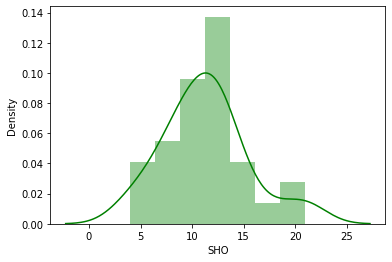

Description ofSV
count    30.000000
mean     43.066667
std       7.869335
min      28.000000
25%      37.250000
50%      42.000000
75%      46.750000
max      62.000000
Name: SV, dtype: float64 Description ofSV


<ipython-input-64-f2b73f56334b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Default1[column],kde=True,color='g',norm_hist=True);


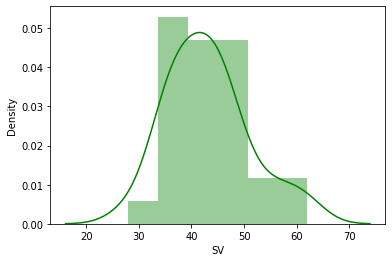

Description ofE
count     30.000000
mean      94.333333
std       13.958889
min       75.000000
25%       86.000000
50%       91.000000
75%       96.750000
max      126.000000
Name: E, dtype: float64 Description ofE


<ipython-input-64-f2b73f56334b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Default1[column],kde=True,color='g',norm_hist=True);


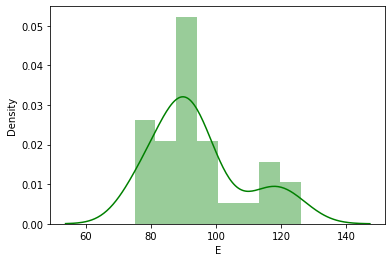

In [66]:
for x in lstnumericcolumns:
    univariateAnalysis(x)

<Axes: xlabel='W', ylabel='count'>

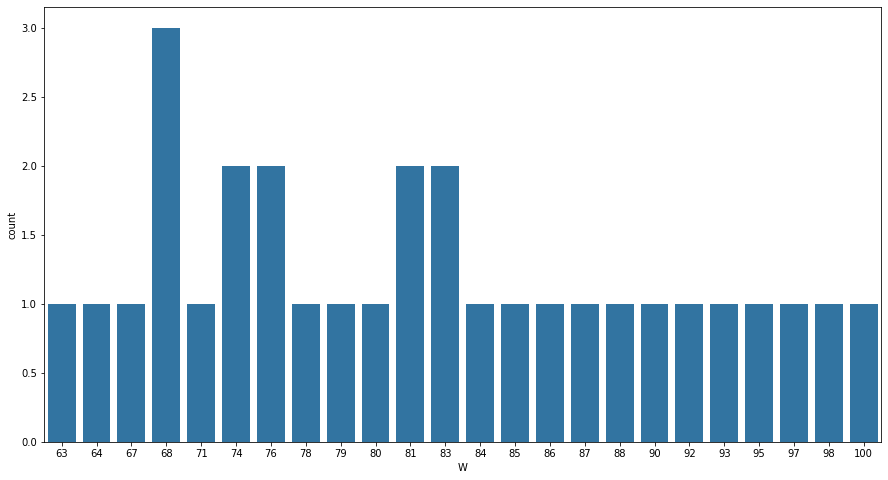

In [67]:
plt.figure(figsize=(15,8))
sns.countplot(data=Default1,x="W")

<Axes: xlabel='R', ylabel='count'>

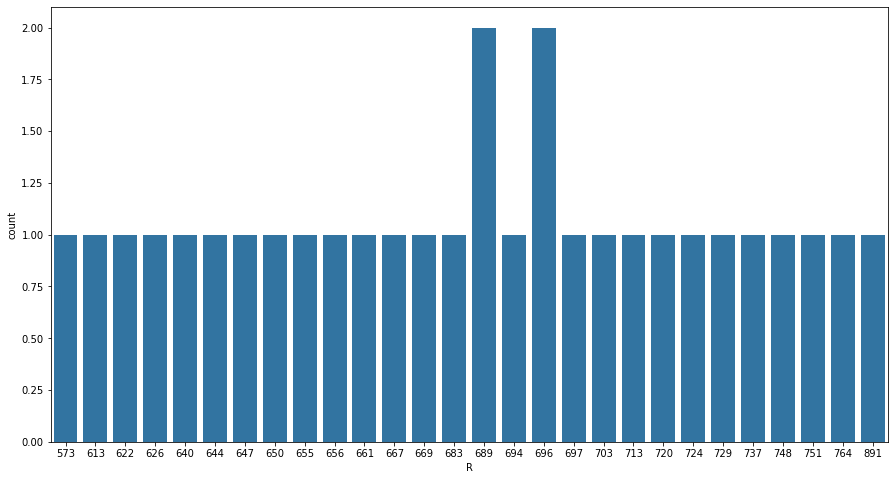

In [68]:
plt.figure(figsize=(15,8))
sns.countplot(data=Default1,x="R")

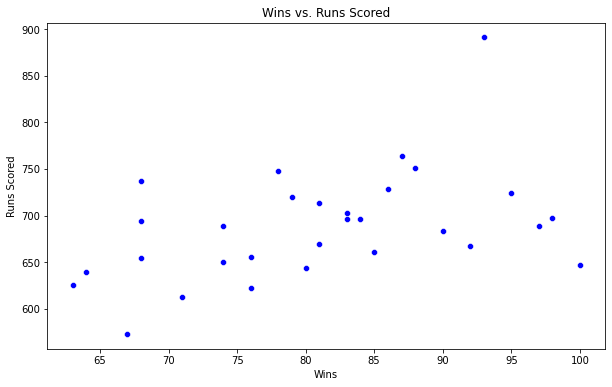

In [69]:
plt.figure(figsize=(10, 6))  # Set the figure size
sns.scatterplot(x='W', y='R', data=Default1, color='blue', marker='o')  
plt.title('Wins vs. Runs Scored')
plt.xlabel('Wins')
plt.ylabel('Runs Scored')
plt.show()

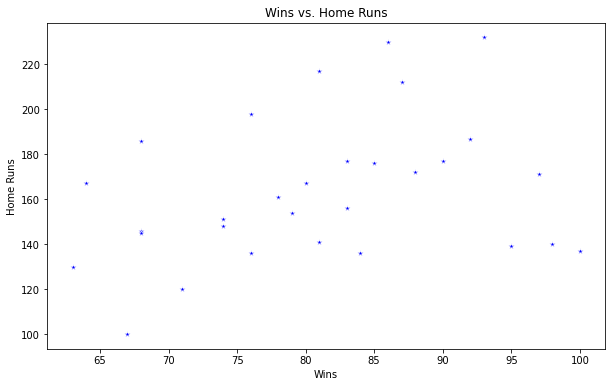

In [70]:
plt.figure(figsize=(10, 6)) 
sns.scatterplot(x='W', y='HR', data=Default1, color='blue', marker='*') 
plt.title('Wins vs. Home Runs')
plt.xlabel('Wins')
plt.ylabel('Home Runs')
plt.show()

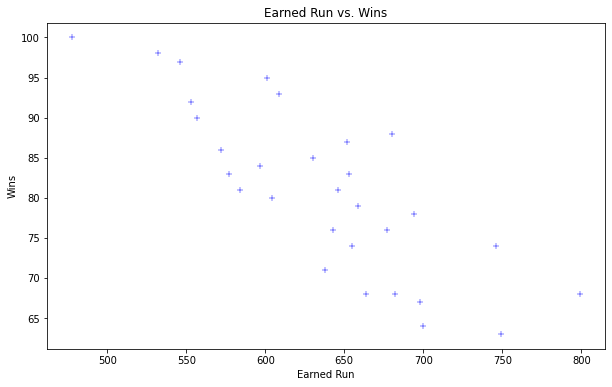

In [71]:
plt.figure(figsize=(10, 6)) 
sns.scatterplot(x='ER', y='W', data=Default1, color='blue', marker='+')  
plt.title('Earned Run vs. Wins')
plt.xlabel('Earned Run')
plt.ylabel('Wins')
plt.show()

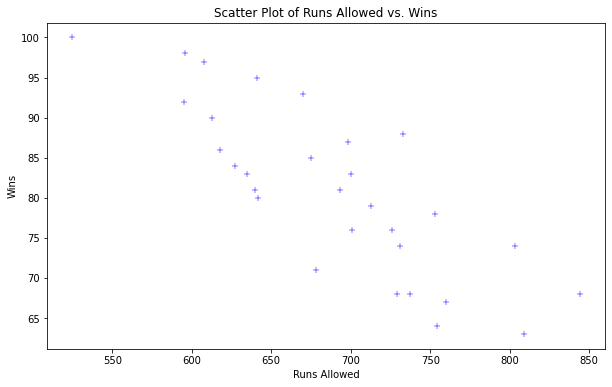

In [72]:

plt.figure(figsize=(10, 6)) 
sns.scatterplot(x='RA', y='W', data=Default1, color='blue', marker='+')
plt.title('Scatter Plot of Runs Allowed vs. Wins')
plt.xlabel('Runs Allowed')
plt.ylabel('Wins')
plt.show()

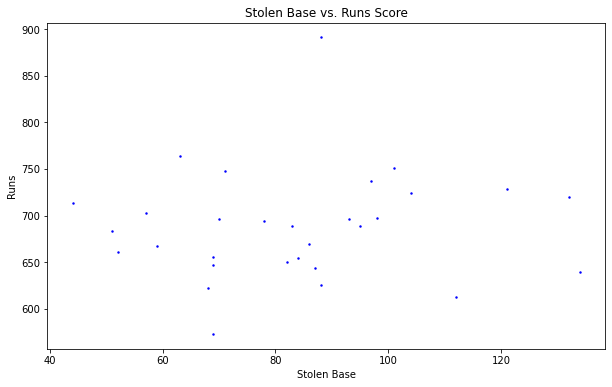

In [73]:


plt.figure(figsize=(10, 6))  # Set the figure size
sns.scatterplot(x='SB', y='R', data=Default1, color='blue', marker='.') 
plt.title('Stolen Base vs. Runs Score')
plt.xlabel('Stolen Base')
plt.ylabel('Runs')
plt.show()

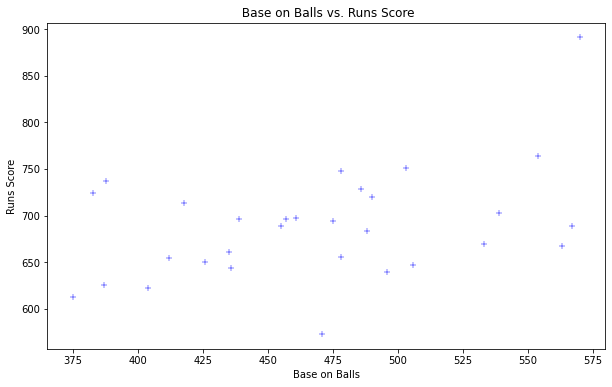

In [74]:

plt.figure(figsize=(10, 6)) 
sns.scatterplot(x='BB', y='R', data=Default1, color='blue', marker='+') 

plt.title(' Base on Balls vs. Runs Score')
plt.xlabel('Base on Balls')
plt.ylabel('Runs Score')

plt.show()

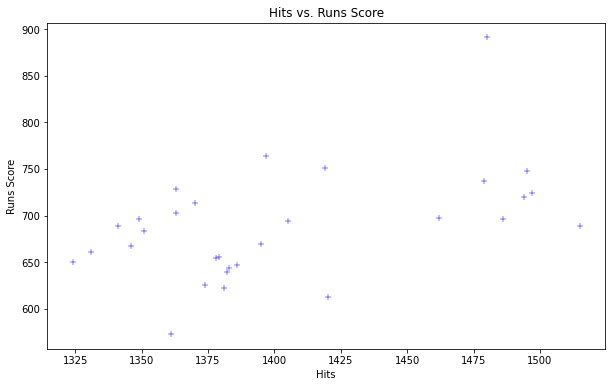

In [75]:
plt.figure(figsize=(10, 6)) 
sns.scatterplot(x='H', y='R', data=Default1, color='blue', marker='+') 
plt.title('Hits vs. Runs Score')
plt.xlabel('Hits')
plt.ylabel('Runs Score')

plt.show()


In [76]:
Default1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


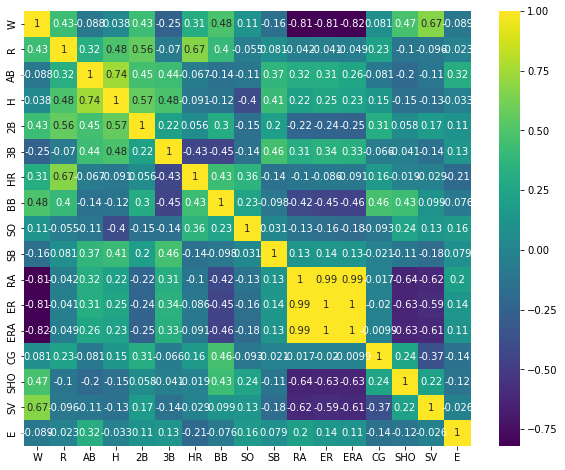

In [77]:
plt.subplots(figsize=(10,8))
sns.heatmap(Default1.corr(),annot=True,cmap="viridis")
plt.show()

In [78]:
X = Default1.drop('W', axis=1) 
y = Default1['W'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:

from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print("Predicted Wins are:", predictions)
mse_linear = mean_squared_error(y_test, predictions)
r2_linear = r2_score(y_test, predictions)
print("Linear Regression MSE:", mse_linear)
print("Linear Regression R^2:", r2_linear)




Predicted Wins are: [ 82.87055379 101.01861025  69.42504558  93.71375515  91.5547615
  79.20277886]
Linear Regression MSE: 27.943032506667006
Linear Regression R^2: 0.7876400316149436


The model has output a series of predicted wins for the teams in the test dataset. A lower MSE value indicates a better fit of the model to the data. An R² value is 0.79 which suggests that approx 79% of the variability in the number of wins can be explained by the model which is considered a strong score, indicating that the model does a good job of capturing the relationship between the independent and the dependent variable.

In [80]:
from sklearn.ensemble import RandomForestRegressor

# random forest regressor model
model2 = RandomForestRegressor(n_estimators=100, random_state=42)
model2.fit(X_train, y_train)
predictions2 = model2.predict(X_test)
print("Predicted Wins are:", predictions2)
mse2 = mean_squared_error(y_test, predictions2)
r2_score = r2_score(y_test, predictions2)
print("Random Forest Regressor MSE:", mse2)
print("Random Forest Regressor R^2:", r2_score)


Predicted Wins are: [80.51 86.6  73.07 88.84 85.15 78.12]
Random Forest Regressor MSE: 51.967916666666675
Random Forest Regressor R^2: 0.6050569981000633


The output here shows that it predicted the number of wins with different accuracy. The model achieved a Mean Squared Error of 51.97, indicating the average squared difference between the predicted and actual wins which is relatively high, suggesting less accuracy compared to the Linear Regression model. Additionally, the R-squared value explains 61% of the variance in the number of wins, which is lower than the Linear Regression model's performance. This suggest that the Linear Regression model is more effective than the Random Forest model.

Random Forest with Grid Search and Cross-Validation

In [83]:
from sklearn.model_selection import GridSearchCV
param_grid_rf1 = {
    'n_estimators': [50, 100, 200], 
    'max_depth': [None, 10, 20, 30], 
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4]
}

randomf = RandomForestRegressor(random_state=42)

# Initiate the GridSearch model
grid_search_randomf = GridSearchCV(estimator=randomf, param_grid=param_grid_rf1, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search_randomf.fit(X_train, y_train)
predictions_rf1 = grid_search_randomf.predict(X_test)
print("Predicted Wins are:", predictions_rf1)
print("Best parameters found: ", grid_search_randomf.best_params_)
print("Best score found: ", -grid_search_randomf.best_score_)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Predicted Wins are: [81.34 85.36 72.4  88.36 84.96 77.94]
Best parameters found:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best score found:  46.44253333333333


Here, the number of estimators, maximum tree depth, minimum samples per split, and minimum samples per leaf. The best parameters determined were no limit on max depth, 2 minimum samples per split, 1 minimum sample per leaf, and 50 trees. The model predicted wins with these optimal settings, achieving a best score of 46.44 MSE in cross-validation, suggesting a significant improvement in predictive accuracy through parameter tuning.

In [84]:
from sklearn.ensemble import GradientBoostingRegressor
param_grid_gboost = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 3]
}

gboost = GradientBoostingRegressor(random_state=42)
grid_search_gboost = GridSearchCV(estimator=gboost, param_grid=param_grid_gboost, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search_gboost.fit(X_train, y_train)
predictions_gb1 = grid_search_gboost.predict(X_test)
print("Predicted Wins are:", predictions_gb1)
print("Best parameters found: ", grid_search_gboost.best_params_)
print("Best score found: ", -grid_search_gboost.best_score_)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Predicted Wins are: [79.85565233 86.67815044 75.92801691 89.91233847 86.33336807 80.30830927]
Best parameters found:  {'learning_rate': 0.01, 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 200}
Best score found:  66.86078234329209


The best parameters identified include a learning rate of 0.01, a max depth of 4, minimum samples per leaf of 3, minimum samples split of 2, and 200 estimators. Using these parameters, the model predicted wins and achieved a best score of approx 66.87 MSE in cross-validation, indicating the average squared deviation between the predicted and actual wins. The model demonstrates substantial effectiveness in capturing patterns, with some predictive error.


Final Inference:
    The Linear Regression model is the best performer for the given dataset. It offers the lowest MSE, suggesting the smallest average error in the predicted number of wins, and the highest R², indicating a strong ability to explain the variance in the number of wins from the given variables.